## Problem 1
## Context
Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.

Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

## Objective
They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

## Data Description
age: The age of the individual in years.
gender: The gender of the individual, categorized as male or female.
profession: The occupation or profession of the individual.
marital_status: The marital status of the individual, such as married &, single
education: The educational qualification of the individual Graduate and Post Graduate
no_of_dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
house_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
salary: The individual's salary or income.
partner_salary: The salary or income of the individual's partner, if applicable.
Total_salary: The total combined salary of the individual and their partner (if applicable).
price: The price of a product or service.
make: The type of automobile

## Importing Libraries

In [1]:
import numpy as np   
import pandas as pd    
import matplotlib.pyplot as plt   
import seaborn as sns

## Loading  and Understanding the Structure of the Data

In [2]:
df = pd.read_csv('austo_automobile+%282%29+%281%29.csv')

In [3]:
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.tail()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,NaN,32200,24000,Hatchback
1580,22,Male,Salaried,Married,Graduate,4,No,No,No,31600,0.0,31600,31000,Hatchback


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


## Shape

In [6]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1581 
no. of columns:  14


## Types of data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


## Missing values

In [8]:
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

Missing values-
* There are 53 missing values in the "Gender" column.
* The "Partner Salary" column has 106 missing values.

In [9]:
df['Gender'].mode()[0]

'Male'

In [10]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [11]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [12]:
df[df['Partner_salary'].isnull()]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
40,53,Female,Salaried,Married,Graduate,1,Yes,No,No,72100,NaN,72100,60000,SUV
43,52,Male,Salaried,Married,Post Graduate,3,No,No,Yes,87600,NaN,88200,51000,SUV
49,52,Female,Business,Married,Post Graduate,4,No,No,Yes,90300,NaN,170400,69000,SUV
59,54,Male,Salaried,Married,Graduate,3,Yes,No,Yes,80600,NaN,81000,51000,SUV
111,48,Female,Business,Married,Graduate,3,No,No,Yes,90300,NaN,161100,62000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,22,Male,Business,Married,Post Graduate,3,Yes,No,No,52100,NaN,52100,28000,Hatchback
1567,22,Male,Salaried,Single,Graduate,0,Yes,Yes,No,39700,NaN,39700,23000,Hatchback
1568,22,Male,Salaried,Married,Graduate,3,No,Yes,No,38000,NaN,38000,23000,Sedan
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,NaN,32000,31000,Hatchback


In [13]:
df['Partner_salary'].fillna(df['Total_salary']-df['Salary'],inplace=True)

In [14]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

In [15]:
df[df['Partner_salary']==df['Total_salary']-df['Salary']]

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


1. For the "Gender" column, a common approach for handling missing categorical values is to impute them with the mode of the data, which represents the most frequently occurring category.

2. In the case of the "Partner Salary" column, it seems like there's another column named "Salary," and the "Total Salary" is derived by summing the values of "Partner Salary" and "Salary." For missing values in the "Partner Salary" column, they have been filled using the formula: Total Salary - Salary.

## Statistical Summary

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,19233.776091,19670.391171,0.0,0.0,25100.0,38100.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


* The "Total_salary" column displays a positively skewed distribution, evident from the mean being lower than the median.
* The "Price" column demonstrates a positively skewed distribution, as the mean exceeds the median.
* Both "No of Dependents" and "Partner Salary" share the same minimum value, while "Total Salary" and "Salary" also have identical minimum values.
* Age spans from a minimum of 22 to a maximum of 54.
* Prices range from a minimum of 18000 to a maximum of 70000.


## Data Irregularities

In [17]:
df['Age'].unique()

array([53, 52, 50, 49, 47, 46, 45, 51, 54, 48, 44, 43, 42, 41, 40, 39, 38,
       37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22],
      dtype=int64)

In [18]:
for i in df.columns:
    print('The unique values in' ,i, 'columns -\n', df[i].unique(),'\n')

The unique values in Age columns -
 [53 52 50 49 47 46 45 51 54 48 44 43 42 41 40 39 38 37 36 35 34 33 32 31
 30 29 28 27 26 25 24 23 22] 

The unique values in Gender columns -
 ['Male' 'Femal' 'Female' 'Femle'] 

The unique values in Profession columns -
 ['Business' 'Salaried'] 

The unique values in Marital_status columns -
 ['Married' 'Single'] 

The unique values in Education columns -
 ['Post Graduate' 'Graduate'] 

The unique values in No_of_Dependents columns -
 [4 3 2 1 0] 

The unique values in Personal_loan columns -
 ['No' 'Yes'] 

The unique values in House_loan columns -
 ['No' 'Yes'] 

The unique values in Partner_working columns -
 ['Yes' 'No'] 

The unique values in Salary columns -
 [99300 95500 97300 72500 79700 79800 80900 79100 89400 83700 81600 81300
 77400 77600 74100 87600 86800 95100 92600 98400 72700 84600 88000 85400
 78000 87900 81900 88500 87700 98300 94900 91100 74500 81700 84700 82200
 79600 77700 72100 96600 72800 73500 90000 87100 90300 72200 78300 902

In [19]:
df['Gender'].replace('Femal','Female',inplace=True)

In [20]:
df['Gender'].replace('Femle','Female',inplace=True)

In [21]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

During the investigation of data irregularities, it was observed that the "Gender" column contains four unique values: 'Male,' 'Femal,' 'Female,' and 'Femle,' which seems inconsistent. In order to rectify this inconsistency, 'Femal' and 'Femle' were modified to 'Female,' aligning them with the correct category. This correction aims to ensure uniformity and accuracy in the representation of gender in the dataset.

## Problem 1 - Data Overview - Observations and Insights
* Missing Values:

1. "Gender" column has 53 missing values.
2. "Partner Salary" column has 106 missing values.

* Handling Missing Values:

1. For "Gender," missing categorical values were imputed with the mode of the data, representing the most frequently occurring      category.
2. In the "Partner Salary" column, missing values were filled using the formula: Total Salary - Salary.
   Distribution Characteristics:
3. "Partner Salary" column displays a negatively skewed distribution, evident from the mean being lower than the median.
4. The "Price" column demonstrates a positively skewed distribution, with the mean exceeding the median.

* Common Minimum Values:

1. "No of Dependents" and "Partner Salary" share the same minimum value.
2. "Total Salary" and "Salary" columns also have identical minimum values.

* Range:

1. Age spans from a minimum of 22 to a maximum of 54.
2. Prices range from a minimum of 18000 to a maximum of 70000.
3. No of dependents ranges from a minimum of 2 to 4
4. Salary ranges from a minimum of 30000 to 99300
5. Partner Salary ranges from 0 to 80500
6. Total Salary ranges from 30000 to 171000
7. Price ranges from 18000 to 70000

* Data Irregularities:

1. In the "Gender" column, it was observed that there are four unique values: 'Male,' 'Femal,' 'Female,' and 'Femle.' To address    this inconsistency, 'Femal' and 'Femle' were standardized to 'Female' for uniformity and accuracy in gender representation.

## Univariate Analysis

<Axes: xlabel='Age'>

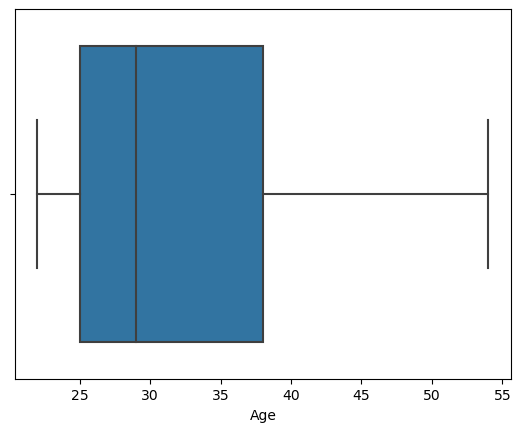

In [22]:
sns.boxplot(data=df,x='Age')


<Axes: xlabel='Age', ylabel='Count'>

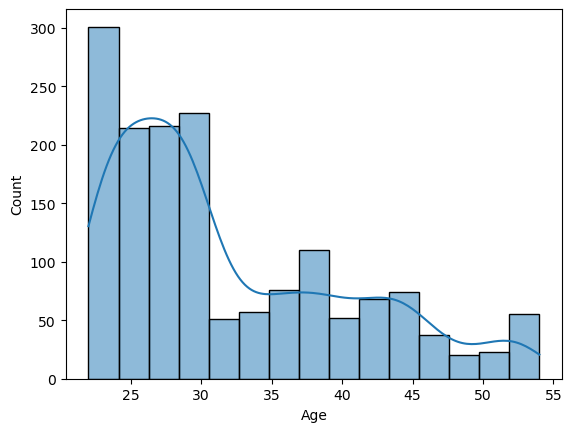

In [23]:
sns.histplot(data=df,x='Age',kde=True)

* Skewness:

1. The age distribution is positively skewed, indicating that there are relatively more individuals with younger ages, and the tail of the distribution extends towards higher ages.
 
* Median Age:

1. The median age is 29, suggesting that it is the middle point of the age distribution. In a positively skewed distribution, the median is typically less than the mean.

* Preference by Age:

1. The histogram reveals a trend where individuals in the younger age group, specifically between 22 and 30, show a higher preference for buying cars.
2. There is a noticeable decrease in car buying preference after the age of 30.

<Axes: xlabel='Gender', ylabel='count'>

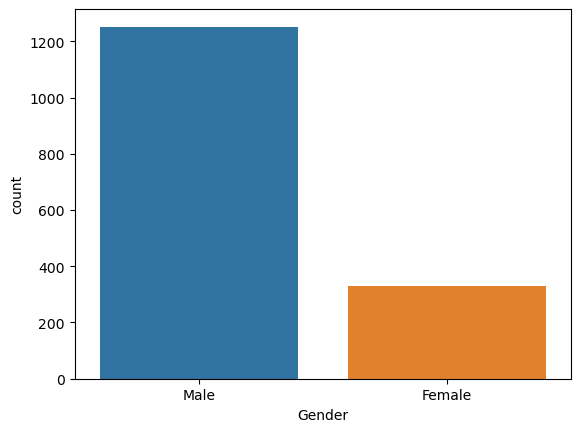

In [24]:
sns.countplot(data=df,x='Gender')

* Gender Distribution:
1. The dataset comprises a greater proportion of males, constituting 79% of the entire dataset, while the representation of females is comparatively smaller.
* Buying Preferences:

1. The observation suggests that, based on the available data, there is a trend indicating that males show a higher preference for buying cars compared to females.

In [25]:
df[df['Gender']=='Male']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
7,52,Male,Salaried,Married,Graduate,4,No,No,Yes,79100,40400.0,119500,68000,SUV
8,52,Male,Salaried,Married,Post Graduate,4,No,No,No,89400,0.0,89400,61000,SUV
9,52,Male,Salaried,Married,Post Graduate,3,No,No,No,83700,0.0,83700,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1576,22,Male,Salaried,Single,Graduate,2,No,Yes,No,33300,0.0,33300,27000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1578,22,Male,Business,Single,Graduate,2,No,Yes,No,32900,0.0,32900,30000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


In [26]:
1252/1581

0.7919038583175205

<Axes: xlabel='Profession', ylabel='count'>

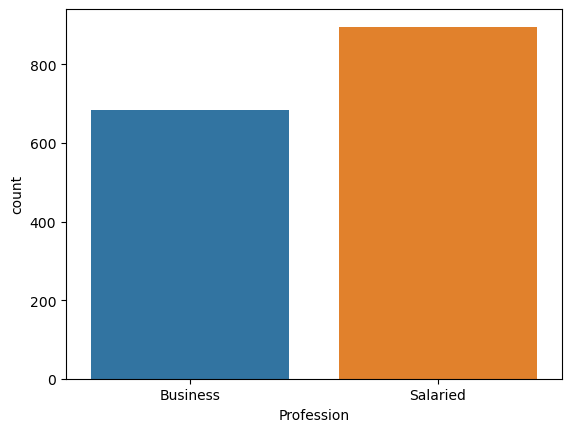

In [27]:
sns.countplot(data=df,x='Profession')

Profession Analysis:

* Preference by Profession:
1. The observation suggests that individuals categorized as business professionals demonstrate a lower preference for purchasing cars compared to those classified as salaried employees.


<Axes: xlabel='Marital_status', ylabel='count'>

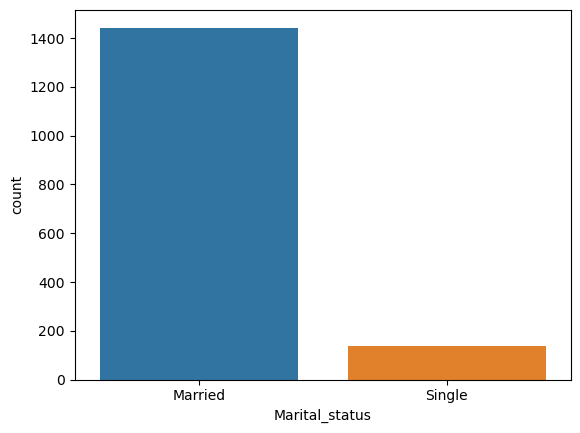

In [28]:
sns.countplot(data=df,x='Marital_status')

In [29]:
df[df['Marital_status']=='Married']

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Female,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1574,22,Male,Salaried,Married,Graduate,3,Yes,Yes,No,34700,0.0,34700,20000,Sedan
1575,22,Male,Salaried,Married,Graduate,3,Yes,No,No,34000,0.0,34000,19000,Hatchback
1577,22,Male,Business,Married,Graduate,4,No,No,No,32000,0.0,32000,31000,Hatchback
1579,22,Male,Business,Married,Graduate,3,Yes,Yes,No,32200,0.0,32200,24000,Hatchback


In [30]:
1443/1581

0.9127134724857685

Marital Status Analysis:

* Ratio of Single to Married Individuals:
1. The dataset reveals a notably higher ratio of married individuals in comparison to single individuals.
2. More specifically, 92% of the dataset consists of married individuals, indicating a strong representation of this demographic in the context of car purchasing.

<Axes: xlabel='Education', ylabel='count'>

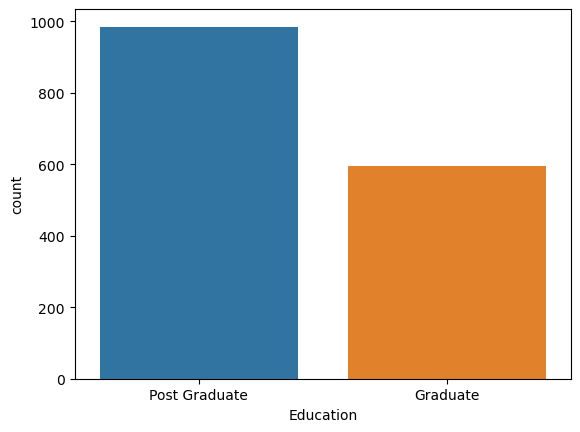

In [31]:
sns.countplot(data=df,x='Education')

In [32]:
df['Education'].value_counts(normalize=True)

Education
Post Graduate    0.623023
Graduate         0.376977
Name: proportion, dtype: float64

Education Analysis:

* Educational Distribution:

1. The dataset is dominated by postgraduate individuals, constituting 62% of the data, in comparison to those with a graduate education.

* Buying Trends by Education:

1. The observation suggests a trend where individuals with postgraduate degrees have a higher representation in the dataset, indicating a slightly higher likelihood of postgraduates buying cars.

<Axes: xlabel='No_of_Dependents', ylabel='count'>

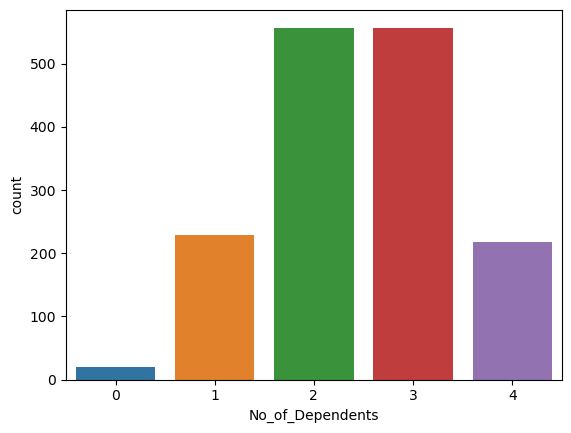

In [33]:
sns.countplot(data=df,x='No_of_Dependents')

<Axes: xlabel='No_of_Dependents'>

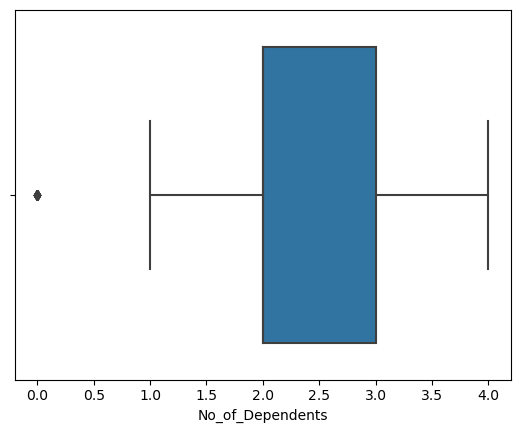

In [34]:
sns.boxplot(data=df,x='No_of_Dependents')

In [35]:
df['No_of_Dependents'].value_counts(normalize=True)

No_of_Dependents
3    0.352309
2    0.352309
1    0.144845
4    0.137887
0    0.012650
Name: proportion, dtype: float64

* Buying Preferences by Number of Dependents:
1. Individuals with 2 or 3 dependents show a higher preference for buying a car compared to other dependency values. Specifically, this group constitutes 70% of the entire dataset.
2. Outliers are present in the data with 0 as the number of dependents.

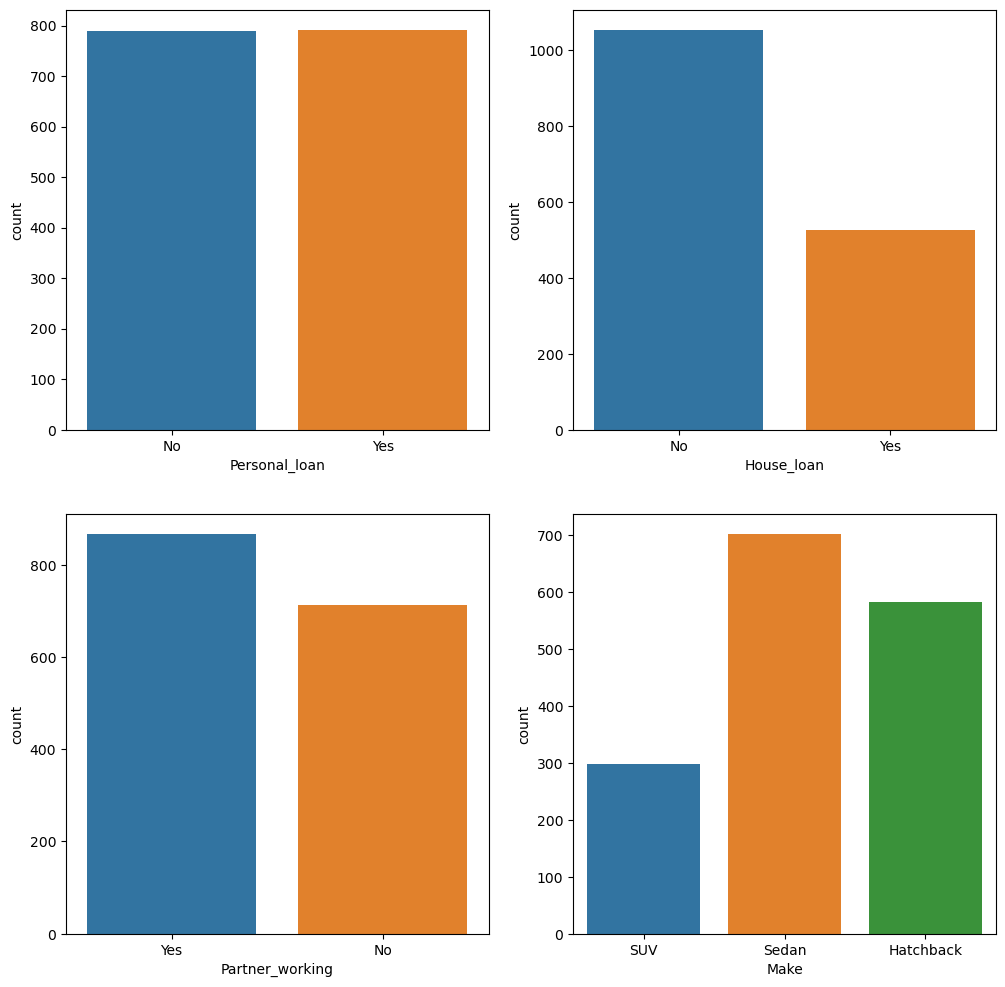

In [36]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12,12)
sns.countplot(data=df , x='Personal_loan', ax=axes[0,0])
sns.countplot(data=df , x='House_loan', ax=axes[0,1])
sns.countplot(data=df , x='Partner_working', ax=axes[1,0])
sns.countplot(data=df , x='Make', ax=axes[1,1])

plt.show()

In [37]:
df['House_loan'].value_counts(normalize=True)

House_loan
No     0.666667
Yes    0.333333
Name: proportion, dtype: float64

In [38]:
df['Partner_working'].value_counts(normalize=True)

Partner_working
Yes    0.54902
No     0.45098
Name: proportion, dtype: float64

In [39]:
df['Make'].value_counts(normalize=True)

Make
Sedan        0.444023
Hatchback    0.368121
SUV          0.187856
Name: proportion, dtype: float64

Personal Loan Analysis:

* Loan Status and Car Buying:
1. Individuals with personal loans and those without personal loans exhibit roughly equal ratios in the dataset.
2. This suggests that both groups show a similar preference for buying cars.

Home Loan Analysis:

* Car Buying Preference and Home Loans:

1. The dataset reveals a ratio where individuals without house loans prefer to buy a car in contrast to those with ongoing home loans.

2. Specifically, the ratio is observed as 33 to 66, indicating a higher preference for car buying among individuals without home loans.

Partner's Employment Status and Car Buying:

1. The dataset indicates that there is not a significant difference in the number of individuals who prefer to buy a car based on whether their partner is working or not.

2. However, there is a slightly higher likelihood of individuals having a car if their partner is employed.

Car Make Preferences:

* Most Preferred Car Type:

1. Sedan emerges as the most favored car type among all individuals in the dataset, constituting 44% of the preferences.

* Least Preferred Car Type:

1. SUV ranks as the least preferred car type, representing only 18% of the preferences.

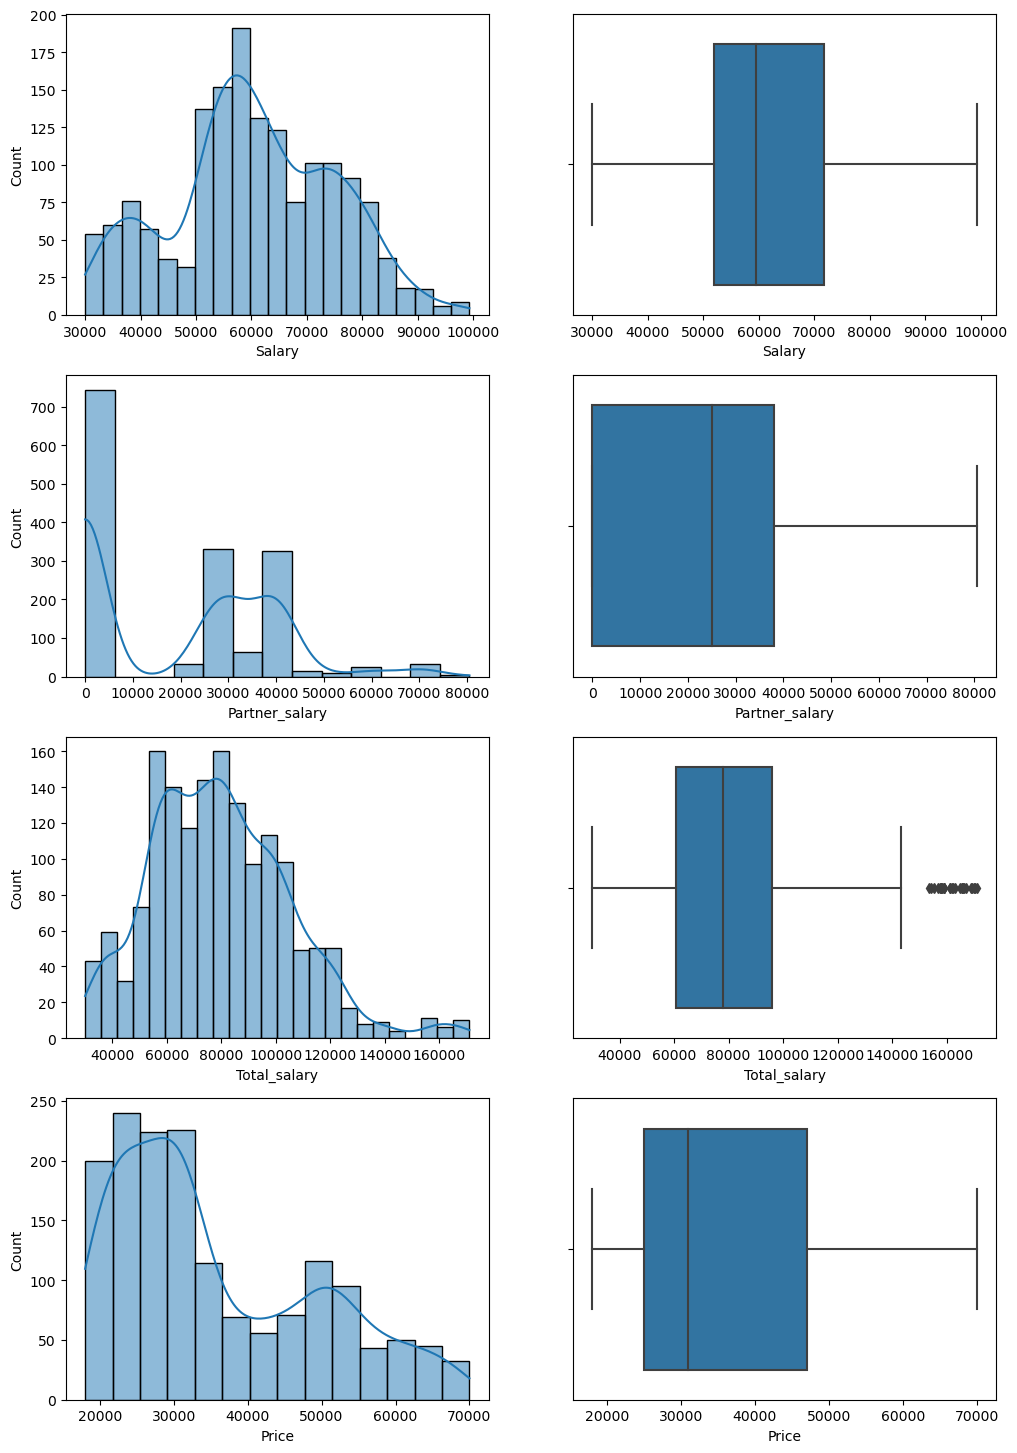

In [40]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(12,18)
sns.histplot(df.Salary, kde=True, ax=axes[0,0]) 
sns.boxplot(x= 'Salary', data=df, ax=axes[0,1]) 
sns.histplot(df.Partner_salary, kde=True, ax=axes[1,0]) 
sns.boxplot(x= 'Partner_salary', data=df, ax=axes[1,1]) 
sns.histplot(df.Total_salary, kde=True, ax=axes[2,0]) 
sns.boxplot(x= 'Total_salary', data=df, ax=axes[2,1]) 
sns.histplot(df.Price, kde=True, ax=axes[3,0])
sns.boxplot(x= 'Price', data=df, ax=axes[3,1]) 
plt.show()

In [41]:
df['Salary'].skew()

-0.011570808595835032

In [42]:
df['Price'].skew()

0.7408739566673956

In [43]:
df['Total_salary'].skew()

0.6097056414760922

In [44]:
df['Partner_salary'].skew()

0.4410686067568632

In [45]:
df['Price'].min()

18000

Salary Analysis -
1. The dataset indicates a higher number of individuals with salaries in the range of 50000 to 80000.
2. Conversely, there is a notably lower number of individuals with salaries exceeding 90000.


Total Salary Analysis:

1. The distribution of total salaries is right-skewed, indicating a higher frequency of lower total salary values and a gradual    decrease towards higher values.
2. An outlier has been identified in the dataset, specifically in the total salary column. This outlier reflects a scenario        where the combined salary of high-income individuals and their partners contributes to an exceptionally high total salary        value
3. Notably, there is a sudden dip in the distribution after the 100000 mark.
4. This dip suggests a decrease in the number of individuals with total salaries exceeding 100000, signifying a less frequent      occurrence of higher total salary values.

Price Analysis:

1. The distribution of car prices is right-skewed, suggesting a higher occurrence of lower-priced cars and a gradual decline in    frequency as prices increase.
2. The observation indicates a higher preference for cars within the price range of 18000 to approximately 32000.


## Outliers

<Axes: xlabel='No_of_Dependents'>

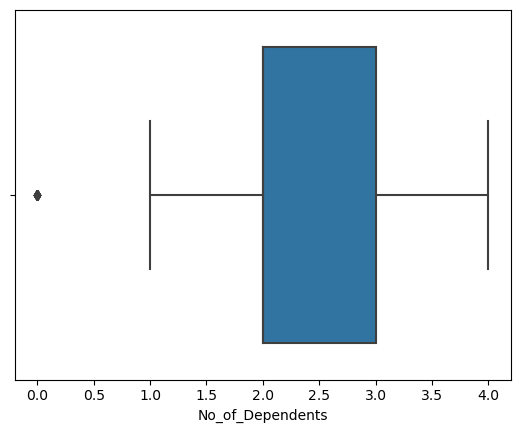

In [46]:
sns.boxplot(data=df,x='No_of_Dependents')

In [47]:
df['No_of_Dependents']=df['No_of_Dependents'].astype('category')
df.dtypes

Age                    int64
Gender                object
Profession            object
Marital_status        object
Education             object
No_of_Dependents    category
Personal_loan         object
House_loan            object
Partner_working       object
Salary                 int64
Partner_salary       float64
Total_salary           int64
Price                  int64
Make                  object
dtype: object

<Axes: xlabel='Total_salary'>

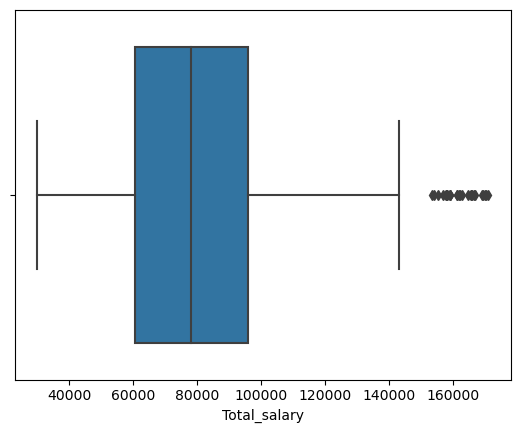

In [48]:
sns.boxplot(data=df,x='Total_salary')

Outlier Treatment Summary:

Number of Dependents:

The "Number of Dependents" column has undergone a transformation in its data type to category. This change reflects the understanding that the number of dependents is more appropriately represented as a categorical variable, considering its nature as a whole number.

Total Salary:

Outliers in the "Total Salary" column have not been treated. The decision not to treat these outliers is based on the consideration that adjusting them could impact the "Partner Salary" and "Salary" columns, As "Total Salary" is derived from their sum.

## Bivariate Analysis

C:\Users\Gagan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


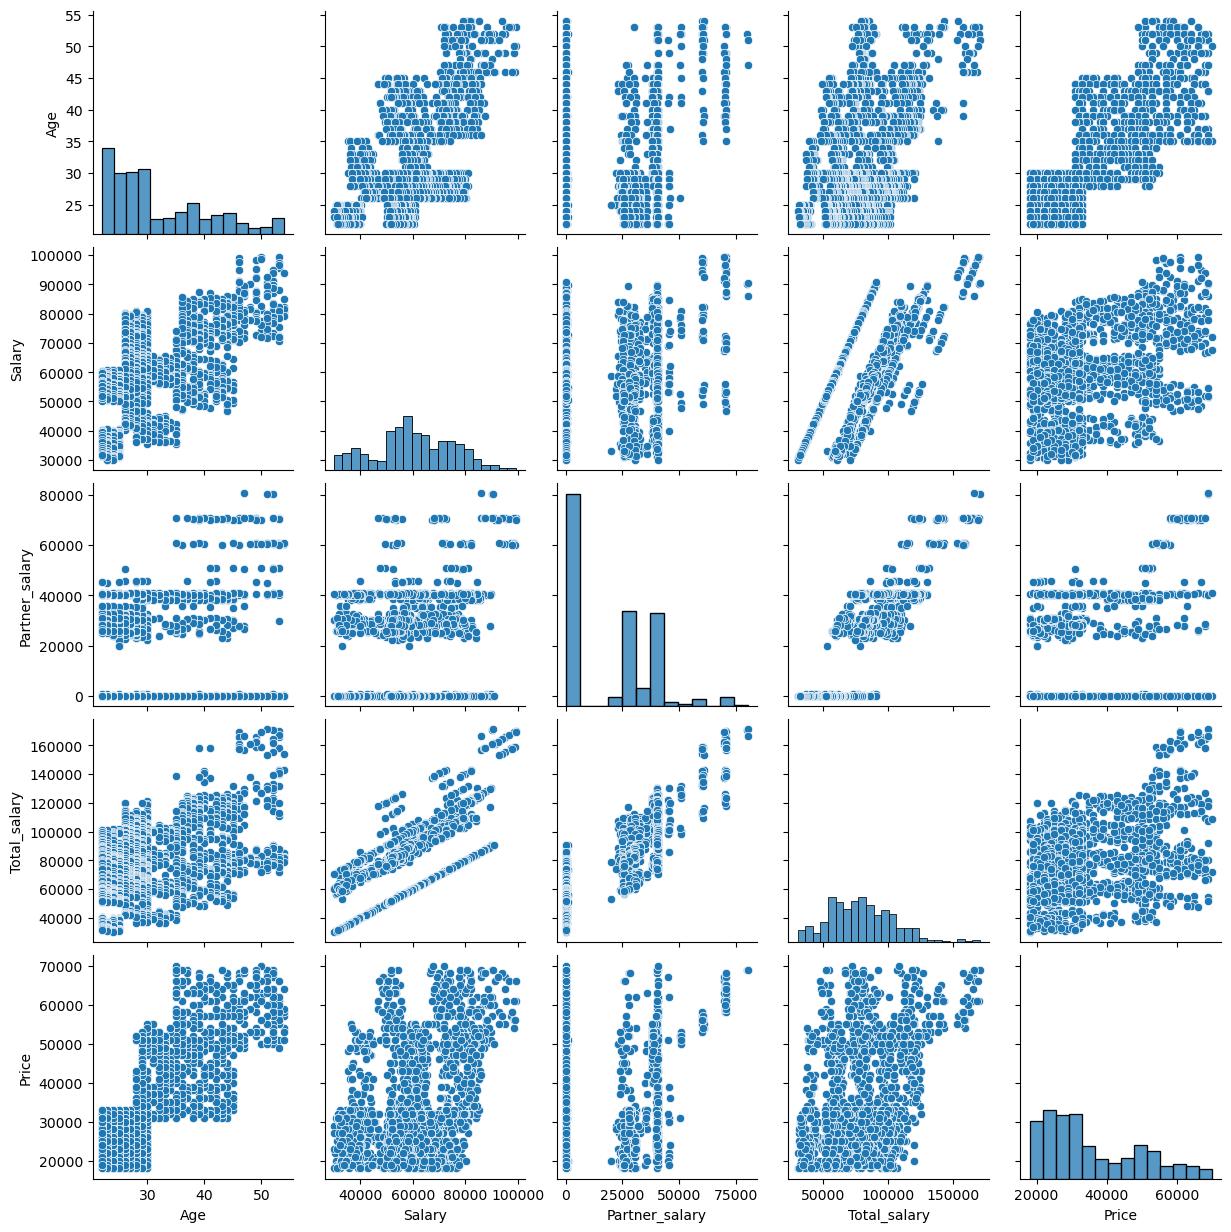

In [49]:
sns.pairplot(df)

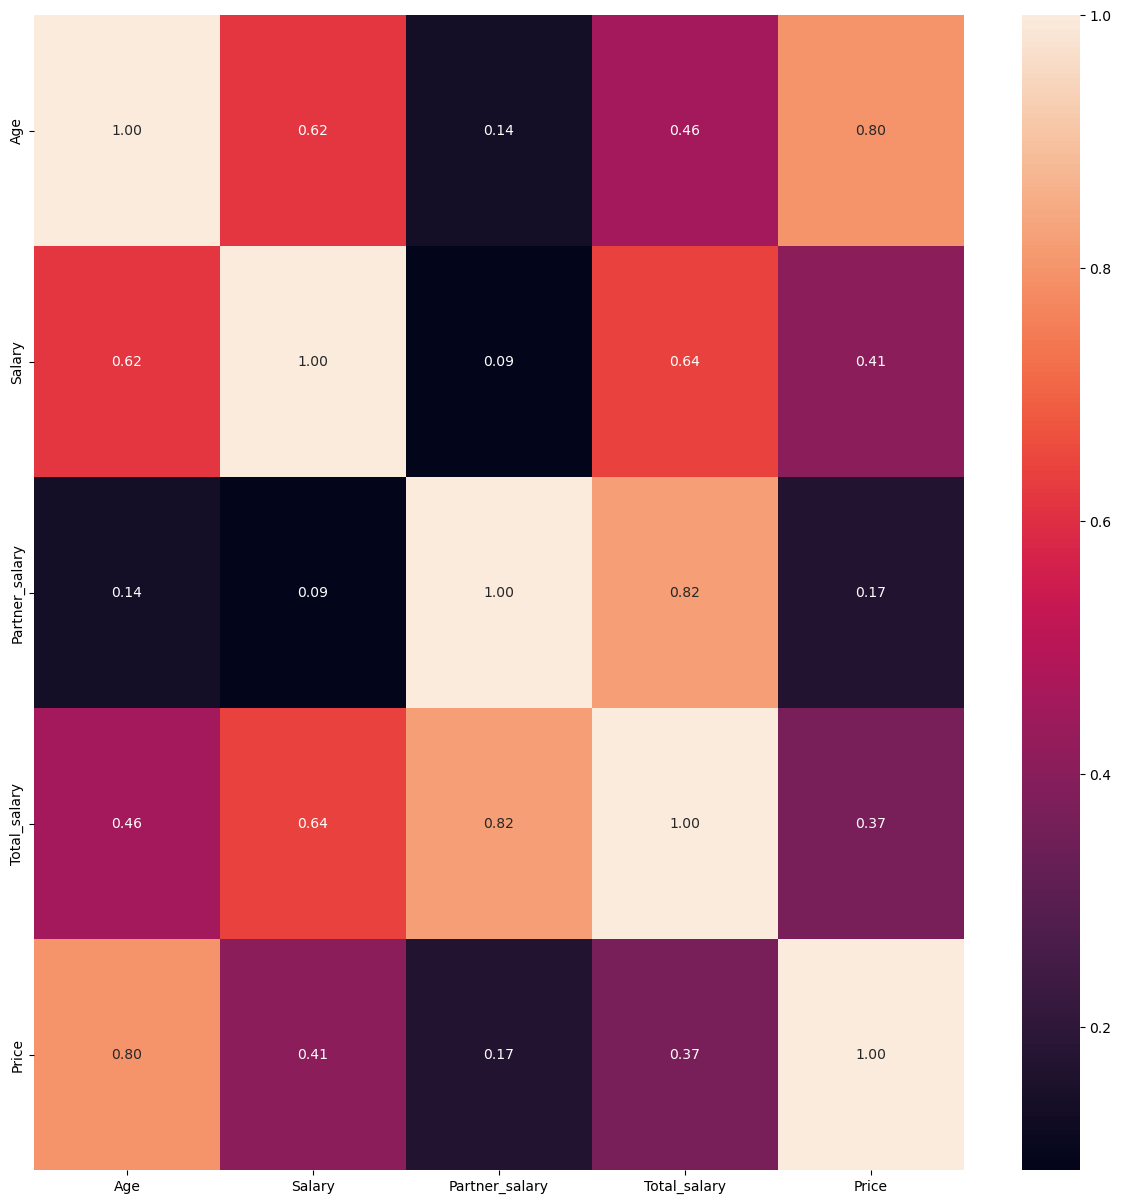

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,fmt=".2f");

Correlation -

Age and Price:

There is a significant positive correlation between age and car price. As age increases, there is a preference for higher-priced cars.

Salary and Price:

The correlation analysis indicates that the relationship between salary and car price is relatively weak. An increase in salary does not exhibit a strong correlation with the inclination to buy more expensive cars.

Age and Salary:

Age and salary have a strong positive correlation. As age increases, salary tends to show an upward trend.

Number of Dependents and Price:

There is no significant correlation between the number of dependents and car price. The presence or absence of dependents does not strongly influence the price preferences for cars.


<Axes: xlabel='Profession', ylabel='Price'>

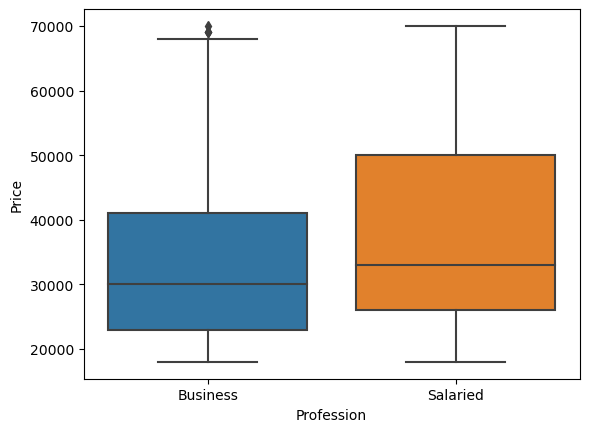

In [51]:
sns.boxplot(data=df, x='Profession',y='Price')

Profession and Price -

* Median Price for Salaried Individuals:

  The median price of cars preferred by salaried individuals is higher compared to that of business individuals.

* Salaried Individual Preferences:

  This suggests that, on average, salaried individuals show a greater preference for higher-priced cars.

* Outliers in Business Individuals:

  Outliers among business individuals indicate that there are a few individuals in the business category who exhibit a             preference for higher-priced cars.

<Axes: xlabel='Make', ylabel='Salary'>

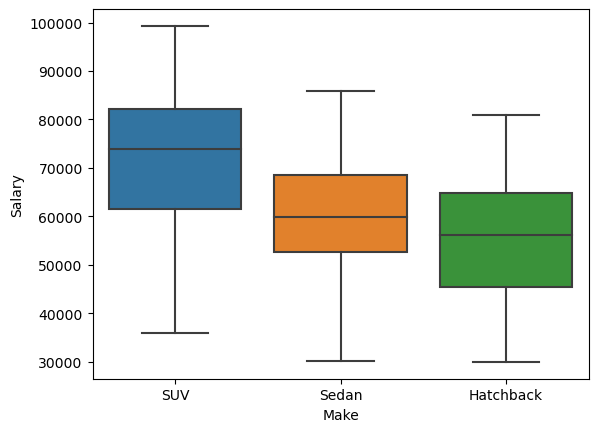

In [52]:
sns.boxplot(data=df, y='Salary',x='Make')

* Median Value Comparison:

  The median value of SUVs, in relation to individual salaries, is higher compared to hatchbacks and sedans.
  Conversely, the median value of hatchbacks is the lowest among the three car types in relation to individual salaries.

* Salary Preferences:

  Individuals with high salaries exhibit a stronger preference for SUVs over sedans and hatchbacks.



<Axes: xlabel='Make', ylabel='Price'>

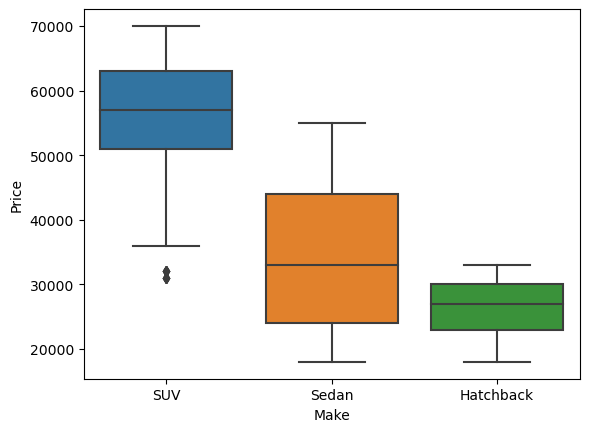

In [53]:
sns.boxplot(data=df, y='Price',x='Make')

Car Type and Price:

Median Price Comparison:

SUVs have the highest median price compared to sedans and hatchbacks.

Relative Expensiveness:

This observation suggests that, on average, SUVs are more expensive compared to sedans and hatchbacks.

<Axes: xlabel='Gender', ylabel='Price'>

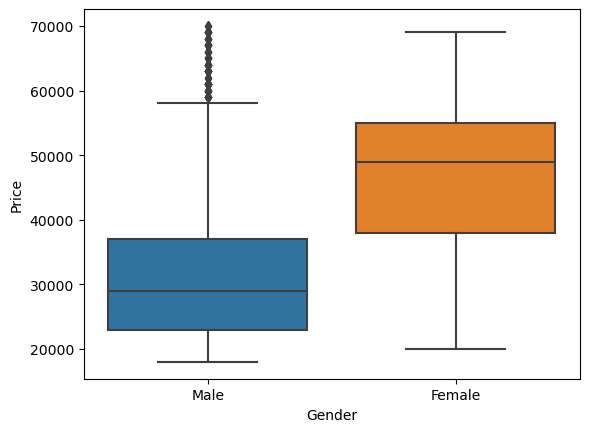

In [54]:
sns.boxplot(data=df, y='Price',x='Gender')

Gender and Car Price:

* Median Comparison:

  Female individuals have a higher median car price compared to males, suggesting a preference for higher-priced cars among       females.

* Female Car Preferences:

  The observation indicates that, on average, more females prefer to buy higher-priced cars.

* Male Outliers:

  Outliers in the male category suggest that there are some males who exhibit a preference for high-priced cars, although this     is not as common as in females.

<Axes: xlabel='Education', ylabel='Price'>

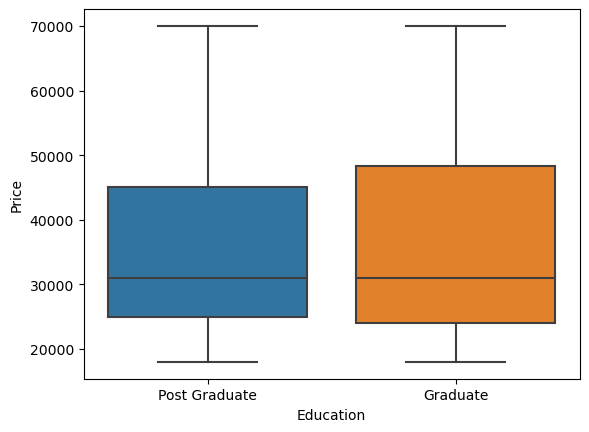

In [55]:
sns.boxplot(data=df, y='Price',x='Education')

Education and Car Price:

* Median Comparison:

The median car prices are approximately the same across different education levels.

* Education and Car Price Relationship:

This suggests that there is not a significant impact on the choice of car prices based on the education level of the individual.

<Axes: xlabel='Marital_status', ylabel='count'>

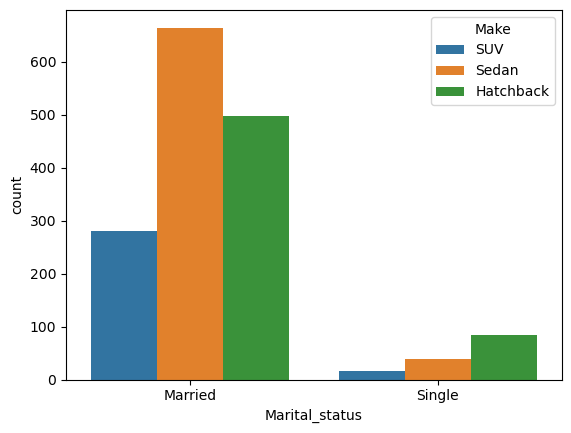

In [56]:
sns.countplot(data=df,x='Marital_status',hue='Make')

Marital Status and Car Preferences:

Car Type Preferences:

The most preferred car type for married individuals is sedan, while for single individuals, it is hatchback.

Car Buying Chances:

The observation suggests that married individuals have a higher likelihood of buying cars compared to single individuals.

<Axes: xlabel='Partner_working', ylabel='Price'>

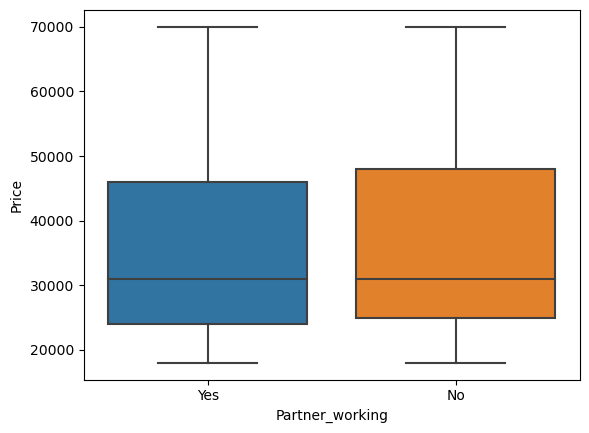

In [57]:
sns.boxplot(data=df,x='Partner_working',y='Price')

Partner's Employment Status and Car Price:

Median Value Comparison:

The median values for car prices are approximately equal for individuals whether their partner is working or not.
Partner's Employment and Car Price Relationship:

This indicates that there is not a significant impact on the preference for car prices based on whether the individual's partner is working or not.

<Axes: xlabel='House_loan', ylabel='Price'>

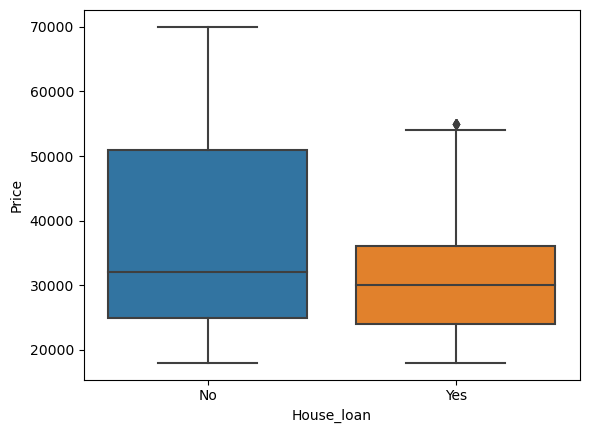

In [58]:
sns.boxplot(data=df,x='House_loan',y='Price')

House loan and price of the car-

Median Value Comparison:

The median value for individuals without a house loan is slightly higher, indicating a potentially higher likelihood for them to buy a higher-priced car compared to individuals with a house loan.

Home Loan and Car Price Relationship:

This suggests that there may be a correlation between not having a house loan and a higher preference for higher-priced cars.

## Problem 1 - Key Questions

###  Explore the data to answer the following key questions: 

### 1. Do men tend to prefer SUVs more compared to women?

<Axes: xlabel='Gender', ylabel='count'>

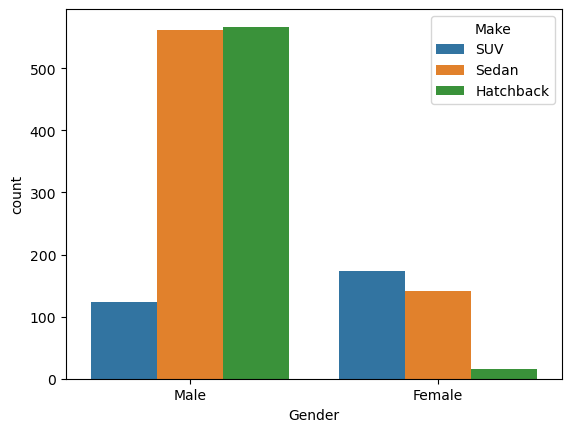

In [59]:
sns.countplot(data=df,x='Gender',hue='Make')

### No,Females tend to prefer SUVs more compared to males, based on a higher count

### 2. What is the likelihood of a salaried person buying a Sedan?

<Axes: xlabel='Profession', ylabel='count'>

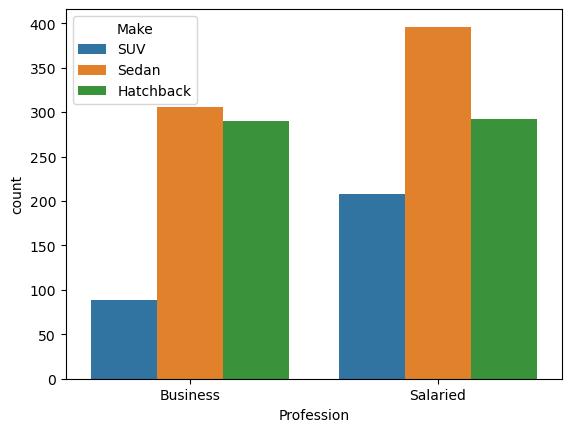

In [60]:
sns.countplot(data=df, x='Profession', hue='Make')

In [61]:
pd.crosstab(df['Profession'], df['Make'], margins=True, normalize = True)

Make,Hatchback,SUV,Sedan,All
Profession,,,,
Business,0.183428,0.056293,0.193548,0.43327
Salaried,0.184693,0.131562,0.250474,0.56673
All,0.368121,0.187856,0.444023,1.00000


### There is a higher likelihood of salaried individuals buying sedans.
### Specifically, 25% of salaried individuals prefer sedans, while the preference among business individuals is 19%.

### 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [62]:
dfnew=df[df['Profession']=='Salaried']

<Axes: xlabel='Profession', ylabel='count'>

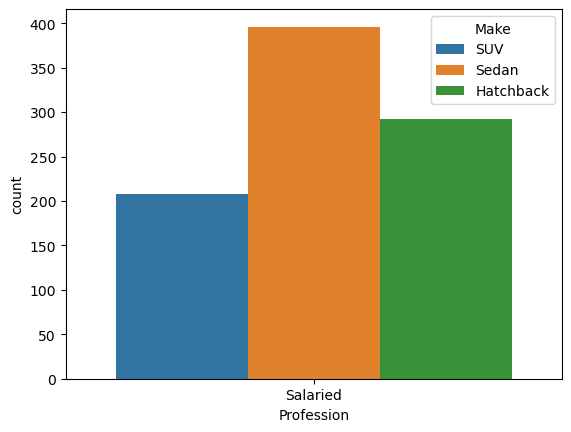

In [63]:
sns.countplot(data=dfnew, x='Profession', hue='Make')

### Contrary to Sheldon Cooper's claim, the available data indicates that the salaried profession generally prefers sedans over SUVs and hatchbacks. It appears that the count data reveals a different trend, with a preference for sedans among salaried individuals

### 4. How does the the amount spent on purchasing automobiles vary by gender?

<Axes: xlabel='Gender', ylabel='Price'>

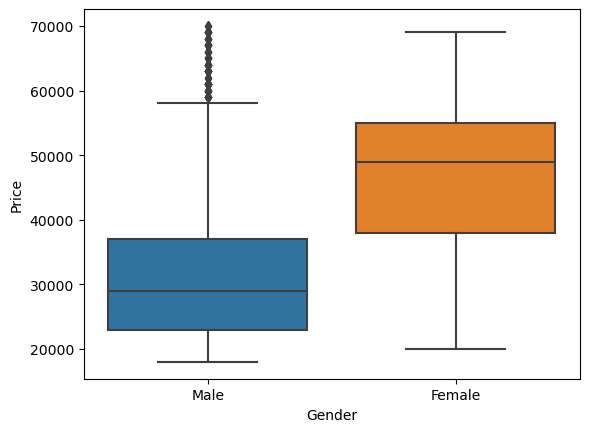

In [64]:
sns.boxplot(data=df,x='Gender',y='Price')

### The median car prices for female individuals are higher than those for males, indicating a higher likelihood of females buying higher-priced cars. However, there are outliers among male individuals, suggesting that some males exhibit a preference for higher-priced cars.

### 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [65]:
df2=df[df['Personal_loan']=='Yes']

In [66]:
df2.Price.sum()

27290000

### 27290000 was spent on purchasing automobiles by individuals who took a personal loan

### 6. How does having a working partner influence the purchase of higher-priced cars?

<Axes: xlabel='Partner_working', ylabel='Price'>

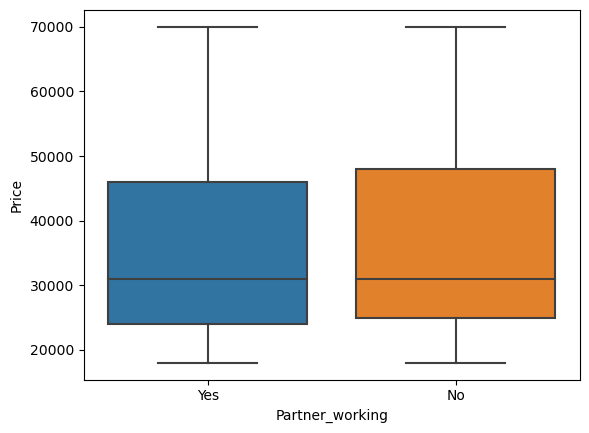

In [67]:
sns.boxplot(data=df,x='Partner_working',y='Price')

### The median car prices for individuals, whether their partner is working or not, are approximately equal. This suggests that the employment status of an individual's partner does not have a significant effect on the choice of car prices within the dataset.

## Problem 1 - Actionable Insights & Recommendations

<Axes: xlabel='Age', ylabel='Price'>

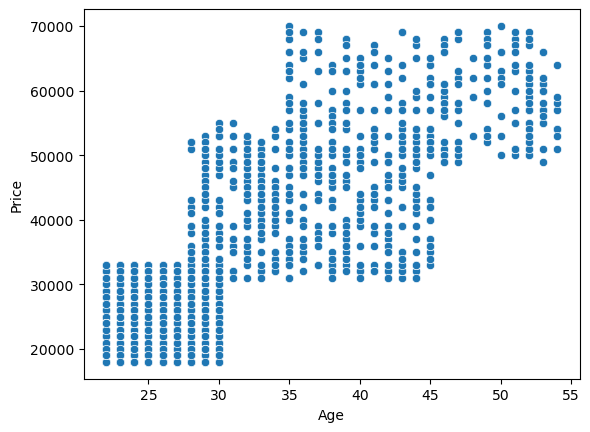

In [68]:
sns.scatterplot(data=df,x='Age',y='Price')

<Axes: xlabel='Marital_status', ylabel='count'>

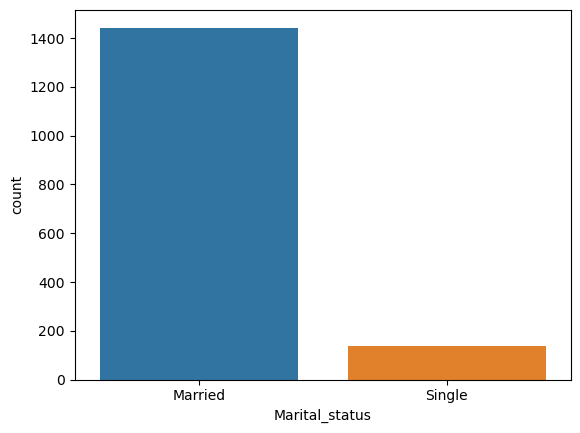

In [69]:
sns.countplot(x='Marital_status',data=df)

<Axes: xlabel='Make', ylabel='count'>

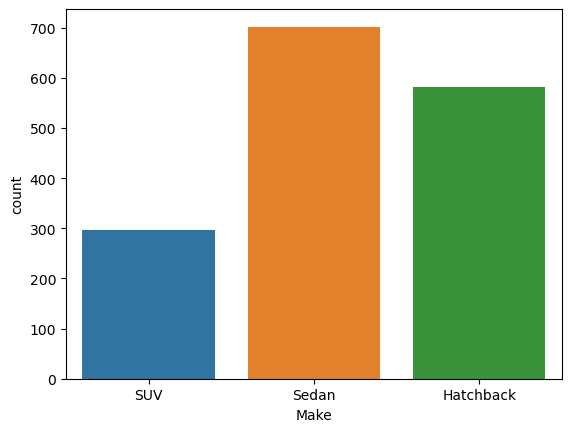

In [70]:
sns.countplot(x='Make',data=df)

<Axes: xlabel='House_loan', ylabel='count'>

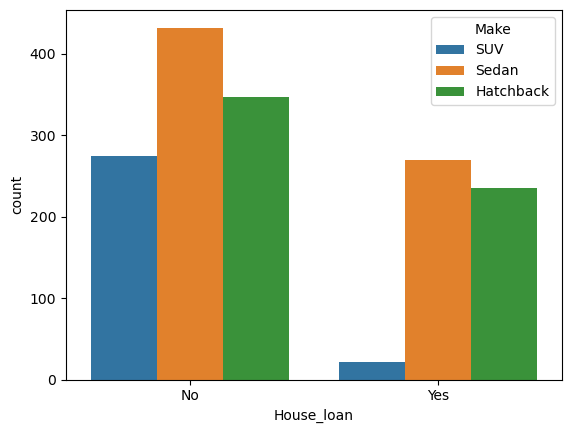

In [71]:
sns.countplot(x='House_loan',hue='Make',data=df)

<Axes: xlabel='Profession', ylabel='count'>

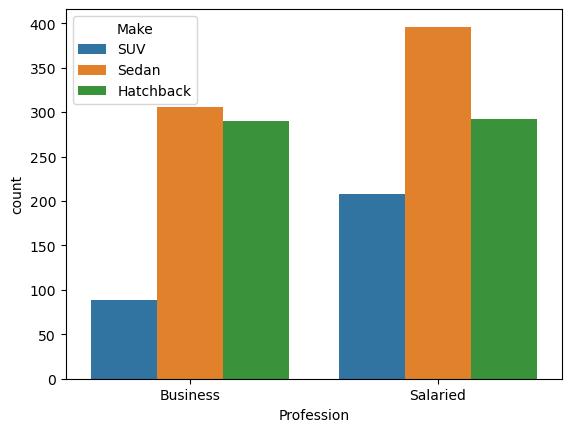

In [72]:
sns.countplot(x='Profession',hue='Make',data=df)

<Axes: xlabel='Make', ylabel='count'>

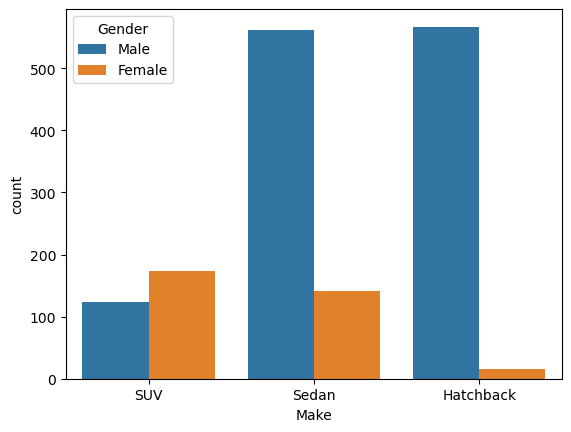

In [73]:
sns.countplot(x='Make',hue='Gender',data=df)

### Actionable Insights

* Targeting SUVs to Females and Sedan, Hatchback to Males:

Observing the data reveals a clear preference among males for hatchback and sedan models compared to females. Leveraging this insight, the company can effectively target and tailor marketing strategies to promote these specific car models to the male demographic. This targeted approach may enhance engagement and potentially increase sales among the male customer base.

* Age-Based Targeting for Cars:

By analyzing the data, it's evident that individuals aged 22 to 27 show a preference for cars priced below 32,000, while those aged 46 and beyond tend to favor cars with prices exceeding 50,000. Leveraging this information, the company can create targeted marketing campaigns and product offerings for specific age groups

* Occupation-Based Targeting:

Consider a targeted approach for salaried individuals, emphasizing Sedans and SUVs, as they have shown a higher likelihood of preferring these car types compared to business individuals.

* Home Loan Influence on Car Preferences:

Recognize that individuals with house loans prefer cars below $50,000, while those without house loans lean towards more expensive cars. Tailor marketing strategies accordingly.

* Market Size Consideration:

Acknowledge that Sedans and Hatchbacks have a larger market share compared to SUVs. Align inventory and marketing efforts to cater to the broader appeal of Sedans and Hatchbacks.

* Marital Status and Car Buying:

Recognize the higher likelihood of car buying among married individuals. Target marketing efforts and promotions to appeal to the preferences and needs of this demographic.

## Problem 2

In [74]:
df_new= pd.read_excel('godigt_cc_data.xlsx')

In [75]:
df_new.head()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
0,1,4384 39XX XXXX XXXX,438439,Visa,edge,2019-09-29,B,0,1,1,...,27,0,0,0,0,0,T,27729,Self Employed,290000
1,2,4377 48XX XXXX XXXX,437748,Visa,prosperity,2002-10-30,A,1,1,1,...,52,0,0,0,0,0,R,280854,0,950000
2,3,4377 48XX XXXX XXXX,437748,Visa,rewards,2013-10-05,C,0,0,0,...,23,1,0,0,0,0,R,70587,Student,210000
3,4,4258 06XX XXXX XXXX,425806,Visa,indianoil,1999-06-01,E,0,1,1,...,49,0,0,1,0,0,T,9156,Self Employed,80000
4,5,4377 48XX XXXX XXXX,437748,Visa,edge,2006-06-13,B,1,1,1,...,21,1,0,0,0,0,T,38108,Salaried,220000


In [76]:
df_new.tail()

,userid,card_no,card_bin_no,Issuer,card_type,card_source_date,high_networth,active_30,active_60,active_90,...,bank_vintage,T+1_month_activity,T+2_month_activity,T+3_month_activity,T+6_month_activity,T+12_month_activity,Transactor_revolver,avg_spends_l3m,Occupation_at_source,cc_limit
8443,8444,4262 41XX XXXX XXXX,426241,Visa,chartered,2010-01-10,A,1,1,1,...,47,0,0,0,0,0,T,108713,0,970000
8444,8445,37691 6XXXX XXXXX,376916,Amex,centurion,2006-07-19,A,0,1,1,...,52,0,0,0,0,0,T,42369,Salaried,200000
8445,8446,4375 51XX XXXX XXXX,437551,Visa,rewards,2006-02-15,D,0,1,1,...,36,0,0,0,0,0,T,8459,Retired,90000
8446,8447,4477 47XX XXXX XXXX,447747,Visa,indianoil,2003-11-06,C,0,0,0,...,54,1,0,0,0,0,T,57100,Salaried,210000
8447,8448,4262 41XX XXXX XXXX,426241,Visa,rewards,2013-01-13,D,0,1,1,...,37,0,0,0,0,0,T,45244,Retired,130000


In [77]:
df_new.shape

(8448, 28)

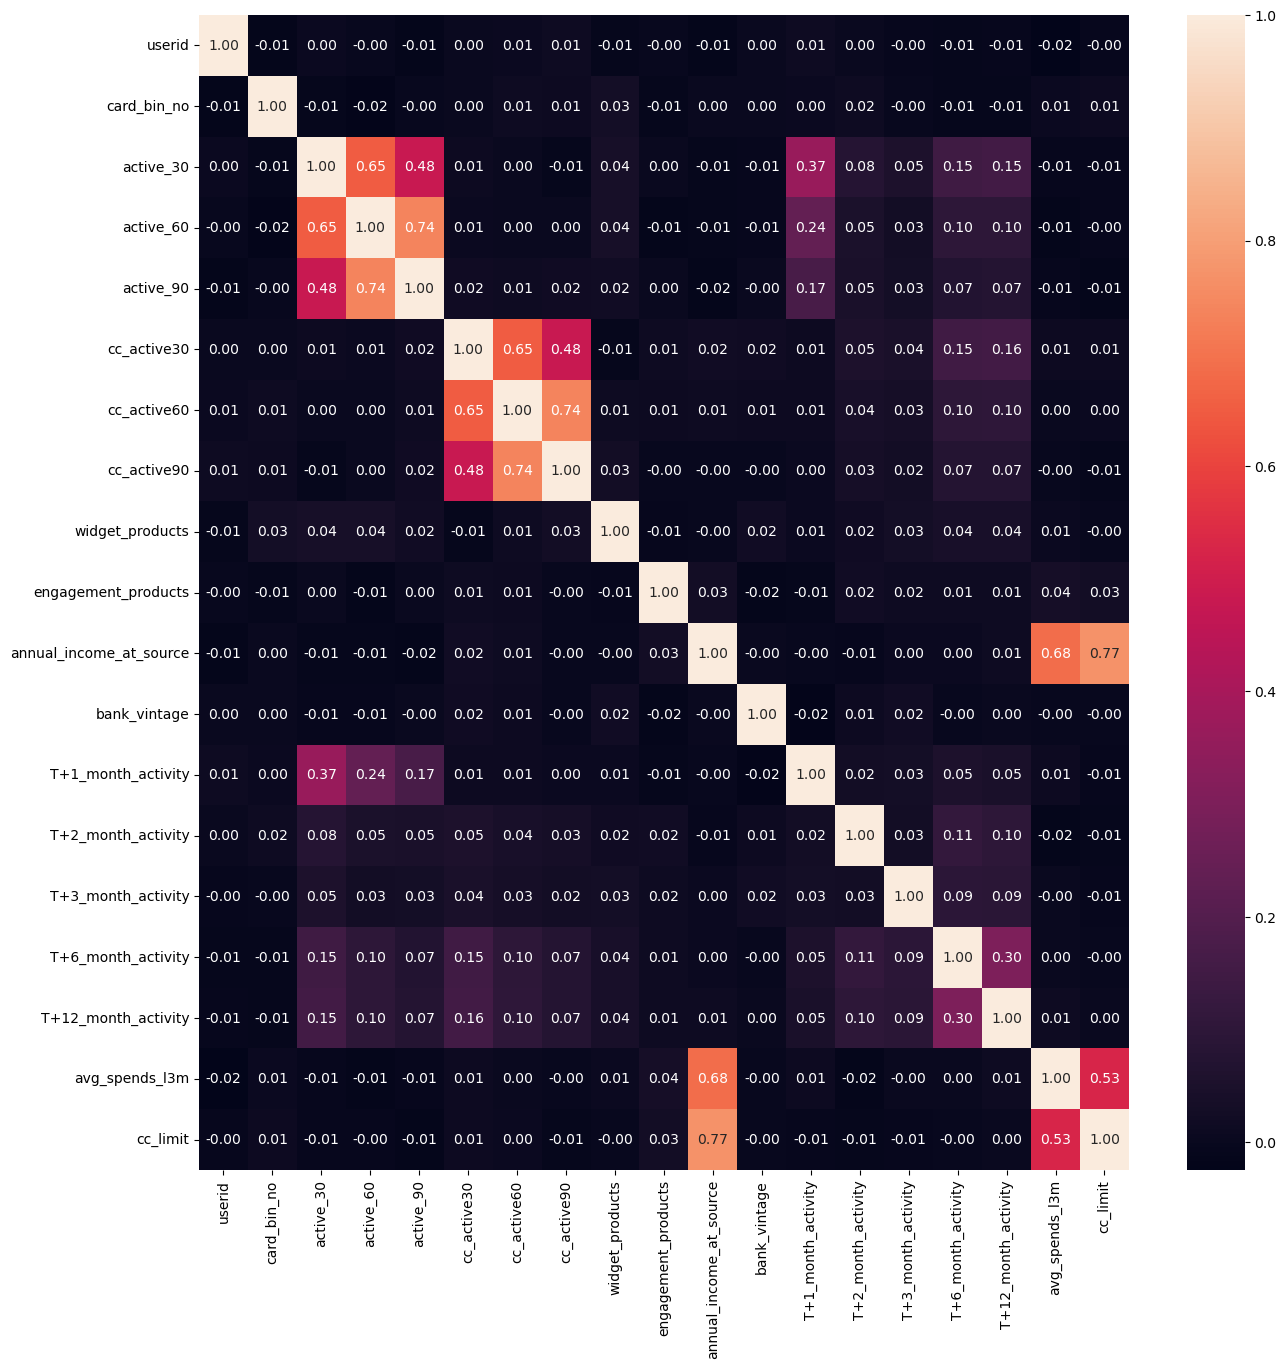

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(df_new.select_dtypes(include='number').corr(),annot=True,fmt=".2f");

Annual_income_at_source - It exhibits a strong correlation with both "avg_spends_l3m" and "cc_limit." This suggests that an individual's annual income at the source plays a pivotal role in determining their spending capacity.

avg_spends_l3m - It demonstrates a robust relationship with "cc_limit," providing valuable insights into the spending patterns of customers. The amount spent over the last three months is strongly linked to the credit card limit, indicating the potential influence of credit limits on customer spending behaviors.

Occupation_at_source - This variable is important to identify the nature of occupation which are the biggest spenders and income earners. This would also help identify the kind of occupation which are currently generating the major chunk of revenue and which can be the focus of future campaigns to improve market share.

Card_type - The type of card and its utilization serve as indicators of the features' usability and relevance in the market. Analyzing the features offered by each card type is essential to ensure they provide value to users, ultimately driving increased spending.

Transactor_revolver- Based on the preliminary analysis of the data, Number of transactions and Total Amount spent by users who generally pay off their balances in full every month is significantly higher than the users who carry the balances to next month.